# 1.**Problem statement** 



Its kaggle competition problem

**"Predicting Molecular Properties"**
Can you measure the magnetic interactions between a pair of atoms?

link for problem statement: https://www.kaggle.com/competitions/champs-scalar-coupling

**1.1 Description**

Think you can use your data science smarts to make big predictions at a molecular level?

This challenge aims to predict interactions between atoms. Imaging technologies like MRI enable us to see and understand the molecular composition of tissues. Nuclear Magnetic Resonance (NMR) is a closely related technology which uses the same principles to understand the structure and dynamics of proteins and molecules.

Researchers around the world conduct NMR experiments to further understanding of the structure and dynamics of molecules, across areas like environmental science, pharmaceutical science, and materials science.

This competition is hosted by members of the CHemistry and Mathematics in Phase Space (CHAMPS) at the University of Bristol, Cardiff University, Imperial College and the University of Leeds. Winning teams will have an opportunity to partner with this multi-university research program on an academic publication

our Challenge

In this competition, you will develop an algorithm that can predict the magnetic interaction between two atoms in a molecule (i.e., the scalar coupling constant).

Once the competition finishes, CHAMPS would like to invite the top teams to present their work, discuss the details of their models, and work with them to write a joint research publication which discusses an open-source implementation of the solution.

About Scalar Coupling

Using NMR to gain insight into a molecule’s structure and dynamics depends on the ability to accurately predict so-called “scalar couplings”. These are effectively the magnetic interactions between a pair of atoms. The strength of this magnetic interaction depends on intervening electrons and chemical bonds that make up a molecule’s three-dimensional structure.

Using state-of-the-art methods from quantum mechanics, it is possible to accurately calculate scalar coupling constants given only a 3D molecular structure as input. However, these quantum mechanics calculations are extremely expensive (days or weeks per molecule), and therefore have limited applicability in day-to-day workflows.

A fast and reliable method to predict these interactions will allow medicinal chemists to gain structural insights faster and cheaper, enabling scientists to understand how the 3D chemical structure of a molecule affects its properties and behavior.

Ultimately, such tools will enable researchers to make progress in a range of important problems, like designing molecules to carry out specific cellular tasks, or designing better drug molecules to fight disease.

Join the CHAMPS Scalar Coupling challenge to apply predictive analytics to chemistry and chemical biology.

# 2.*Machine learning problem*

2.1 **Data overview**

Refer:  https://www.kaggle.com/competitions/champs-scalar-coupling

In this competition, you will be predicting the scalar_coupling_constant between atom pairs in molecules, given the two atom types (e.g., C and H), the coupling type (e.g., 2JHC), and any features you are able to create from the molecule structure (xyz) files.

For this competition, you will not be predicting all the atom pairs in each molecule rather, you will only need to predict the pairs that are explicitly listed in the train and test files. For example, some molecules contain Fluorine (F), but you will not be predicting the scalar coupling constant for any pair that includes F.

The training and test splits are by molecule, so that no molecule in the training data is found in the test data.

Files
train.csv - the training set, where the first column (molecule_name) is the name of the molecule where the coupling constant originates (the corresponding XYZ file is located at ./structures/.xyz), the second (atom_index_0) and third column (atom_index_1) is the atom indices of the atom-pair creating the coupling and the fourth column (scalar_coupling_constant) is the scalar coupling constant that we want to be able to predict
test.csv - the test set; same info as train, without the target variable
sample_submission.csv - a sample submission file in the correct format
structures.zip - folder containing molecular structure (xyz) files, where the first line is the number of atoms in the molecule, followed by a blank line, and then a line for every atom, where the first column contains the atomic element (H for hydrogen, C for carbon etc.) and the remaining columns contain the X, Y and Z cartesian coordinates (a standard format for chemists and molecular visualization programs)
structures.csv - this file contains the same information as the individual xyz structure files, but in a single file
Additional Data
NOTE: additional data is provided for the molecules in Train only!

dipole_moments.csv - contains the molecular electric dipole moments. These are three dimensional vectors that indicate the charge distribution in the molecule. The first column (molecule_name) are the names of the molecule, the second to fourth column are the X, Y and Z components respectively of the dipole moment.
magnetic_shielding_tensors.csv - contains the magnetic shielding tensors for all atoms in the molecules. The first column (molecule_name) contains the molecule name, the second column (atom_index) contains the index of the atom in the molecule, the third to eleventh columns contain the XX, YX, ZX, XY, YY, ZY, XZ, YZ and ZZ elements of the tensor/matrix respectively.
mulliken_charges.csv - contains the mulliken charges for all atoms in the molecules. The first column (molecule_name) contains the name of the molecule, the second column (atom_index) contains the index of the atom in the molecule, the third column (mulliken_charge) contains the mulliken charge of the atom.
potential_energy.csv - contains the potential energy of the molecules. The first column (molecule_name) contains the name of the molecule, the second column (potential_energy) contains the potential energy of the molecule.
scalar_coupling_contributions.csv - The scalar coupling constants in train.csv (or corresponding files) are a sum of four terms. scalar_coupling_contributions.csv contain all these terms. The first column (molecule_name) are the name of the molecule, the second (atom_index_0) and third column (atom_index_1) are the atom indices of the atom-pair, the fourth column indicates the type of coupling, the fifth column (fc) is the Fermi Contact contribution, the sixth column (sd) is the Spin-dipolar contribution, the seventh column (pso) is the Paramagnetic spin-orbit contribution and the eighth column (dso) is the Diamagnetic spin-orbit contribution.

2.2 **Mapping the real world problem to a machine learning problem**

2.2.1. **Type of machine learning problem**

**It is a regression problem** 

2.2.2 **Performane metric**

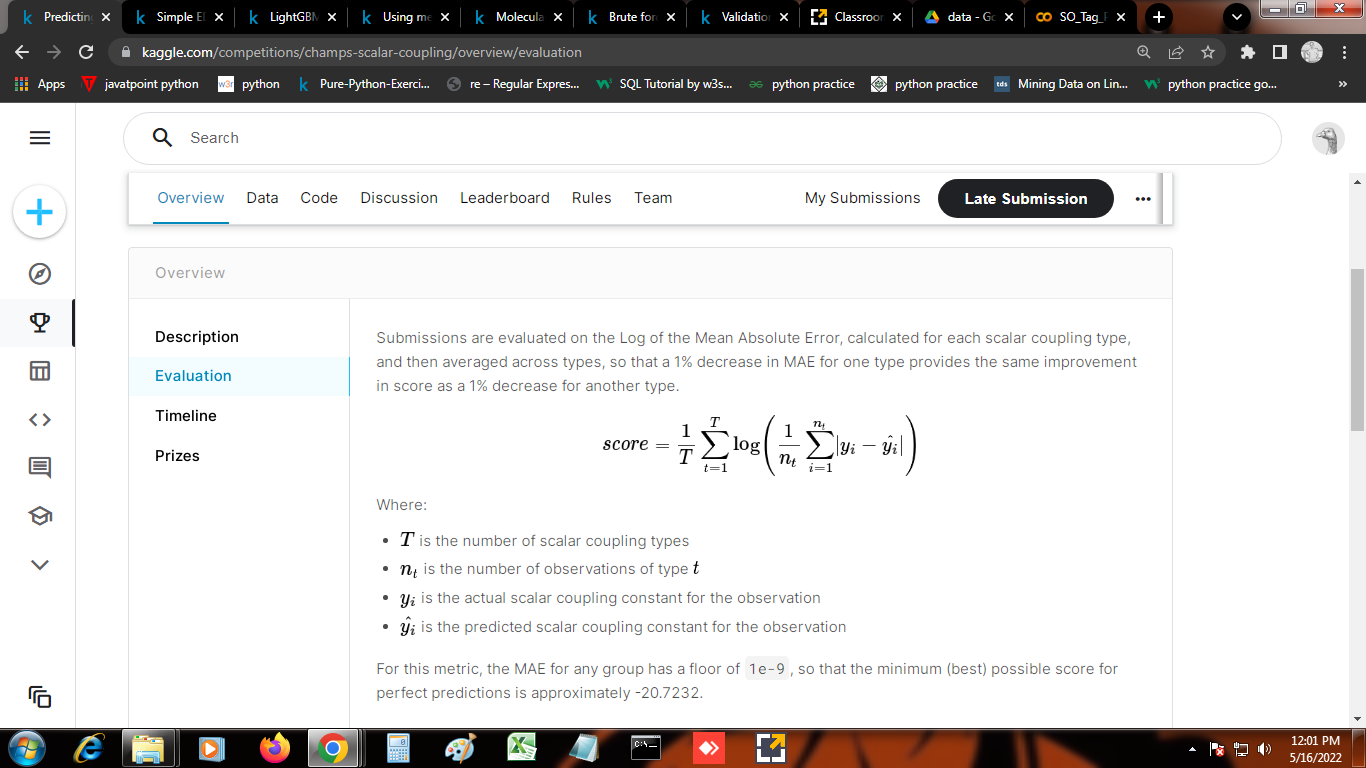

# 3.**Exploratory data analysis** 

# 3.1.Loading libraries 

In [ ]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=2c91eeca07fca4677273652a9b52c82e98bbca3ad4097300810e109e3281fe4e
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
#importing bunch of libraries
import pandas as pd
import numpy as np

import seaborn as sns
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn import metrics
from sklearn import linear_model
import gc

import warnings
warnings.filterwarnings("ignore")

from IPython.display import HTML
import json
import altair as alt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import cufflinks

import networkx as nx

from numba import jit
from tqdm import tqdm_notebook
from catboost import CatBoostRegressor, CatBoostClassifier

from itertools import product
import altair as alt
from altair.vega import v5
from IPython.display import HTML
#Importing libraries
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.ensemble import GradientBoostingRegressor

import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno ### missingno provides a small toolset of flexible and easy-to-use missing data visualizations


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 3.2 Data loading and EDA

* We have a lot of files, let's focus on the main ones for now.

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/self case study-1/train.csv.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/self case study-1/train.csv.zip
  inflating: train.csv               


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/self case study-1/test.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/self case study-1/test.zip
  inflating: test.csv                


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/self case study-1/structures.csv.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/self case study-1/structures.csv.zip
  inflating: structures.csv          


In [ ]:
#Loading train dataset in pandas dataframe
train = pd.read_csv('/content/train.csv')

print(train.shape)
print('*'*100)

print(train.head(2))
print('*'*100)

## Information about training data
train.info()
print('*'*100)

# Dropping duplicates ir any
train.drop_duplicates()
print(train.shape)

print('No duplicates are present in the dataset')
print('*'*100)


## Checking for null values
print('Checking for null values present in the dataset\n')
print(train.isnull().sum())  
print('*'*100)

(4659076, 6)
****************************************************************************************************
   id     molecule_name  atom_index_0  atom_index_1  type  \
0   0  dsgdb9nsd_000001             1             0  1JHC   
1   1  dsgdb9nsd_000001             1             2  2JHH   

   scalar_coupling_constant  
0        84.807599999999994  
1       -11.257000000000000  
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659076 entries, 0 to 4659075
Data columns (total 6 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   molecule_name             object 
 2   atom_index_0              int64  
 3   atom_index_1              int64  
 4   type                      object 
 5   scalar_coupling_constant  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.3+ MB
***********************

In [ ]:
#Loading test dataset in pandas dataframe
test = pd.read_csv('/content/test.csv')
print('*'*100)
print(test.shape)
print('*'*100)

print(test.head(2))
print('*'*100)

## Information about test data
test.info()
print('*'*100)

# Dropping duplicates ir any
test.drop_duplicates()
print(test.shape)

print('No duplicates are present in the dataset')
print('*'*100)


## Checking for null values
print('Checking for null values present in the dataset\n')
print(test.isnull().sum())  
print('*'*100)

****************************************************************************************************
(2505542, 5)
****************************************************************************************************
        id     molecule_name  atom_index_0  atom_index_1  type
0  4658147  dsgdb9nsd_000004             2             0  2JHC
1  4658148  dsgdb9nsd_000004             2             1  1JHC
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505542 entries, 0 to 2505541
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id             int64 
 1   molecule_name  object
 2   atom_index_0   int64 
 3   atom_index_1   int64 
 4   type           object
dtypes: int64(3), object(2)
memory usage: 95.6+ MB
****************************************************************************************************
(2505542, 5)
No duplicates are present in 

In [ ]:
#Loading structuress dataset in pandas dataframe
structures = pd.read_csv('/content/structures.csv')

print(structures.shape)
print('*'*100)

print(structures.head(2))
print('*'*100)

## Information about structures data
structures.info()
print('*'*100)

# Dropping duplicates ir any
structures.drop_duplicates()
print(structures.shape)

print('No duplicates are present in the dataset')
print('*'*100)


## Checking for null values
print('Checking for null values present in the dataset\n')
print(structures.isnull().sum())  
print('*'*100)

(2358875, 6)
****************************************************************************************************
      molecule_name  atom_index atom             x             y             z
0  dsgdb9nsd_000001           0    C -0.0126981359  1.0858041578  0.0080009958
1  dsgdb9nsd_000001           1    H  0.0021504160 -0.0060313176  0.0019761204
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358875 entries, 0 to 2358874
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   molecule_name  object 
 1   atom_index     int64  
 2   atom           object 
 3   x              float64
 4   y              float64
 5   z              float64
dtypes: float64(3), int64(1), object(2)
memory usage: 108.0+ MB
****************************************************************************************************
(2358875, 6)
No duplicates are present in the d

**3.2.1 Data overview**

In [ ]:
train.head(2)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807599999999994
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000000000000


In [ ]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.659076000000000e+06,4.659076000000000e+06,4.659076000000000e+06,4.659076000000000e+06
mean,2.329537500000000e+06,1.335677353191920e+01,5.881244693153750e+00,1.591590725692002e+01
std,1.344959535725300e+06,3.269432464035316e+00,4.993793734155198e+00,3.493466036245305e+01
min,0.000000000000000e+00,1.000000000000000e+00,0.000000000000000e+00,-4.476050000000000e+01
25%,1.164768750000000e+06,1.100000000000000e+01,2.000000000000000e+00,-2.551462500000000e-01
50%,2.329537500000000e+06,1.300000000000000e+01,5.000000000000000e+00,2.280350000000000e+00
75%,3.494306250000000e+06,1.600000000000000e+01,8.000000000000000e+00,7.389100000000000e+00
max,4.659075000000000e+06,2.800000000000000e+01,2.800000000000000e+01,2.077090000000000e+02


In [ ]:
test.head(2)

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC


In [ ]:
structures.head(2)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.0126981359,1.0858041578,0.0080009958
1,dsgdb9nsd_000001,1,H,0.0021504160,-0.0060313176,0.0019761204


**3.2.2.  Understanding the target distribution**

In [ ]:
print(f'There are {train.shape[0]} rows in train data.')
print(f'There are {test.shape[0]} rows in test data.')

print(f"There are {train['molecule_name'].nunique()} distinct molecules in train data.")
print(f"There are {test['molecule_name'].nunique()} distinct molecules in test data.")
print(f"There are {structures['atom'].nunique()} unique atoms.")
print(f"There are {train['type'].nunique()} unique types.")

There are 4659076 rows in train data.
There are 2505542 rows in test data.
There are 85012 distinct molecules in train data.
There are 45772 distinct molecules in test data.
There are 5 unique atoms.
There are 8 unique types.


So in our main data files we have information about moleculas and pairs of atoms

* test set is ~2 times smaller that train set;
* we have 5 unique atoms and 8 coupling types;

Text(0.5, 1.0, 'Boxplot of scalar_coupling_constant by type')

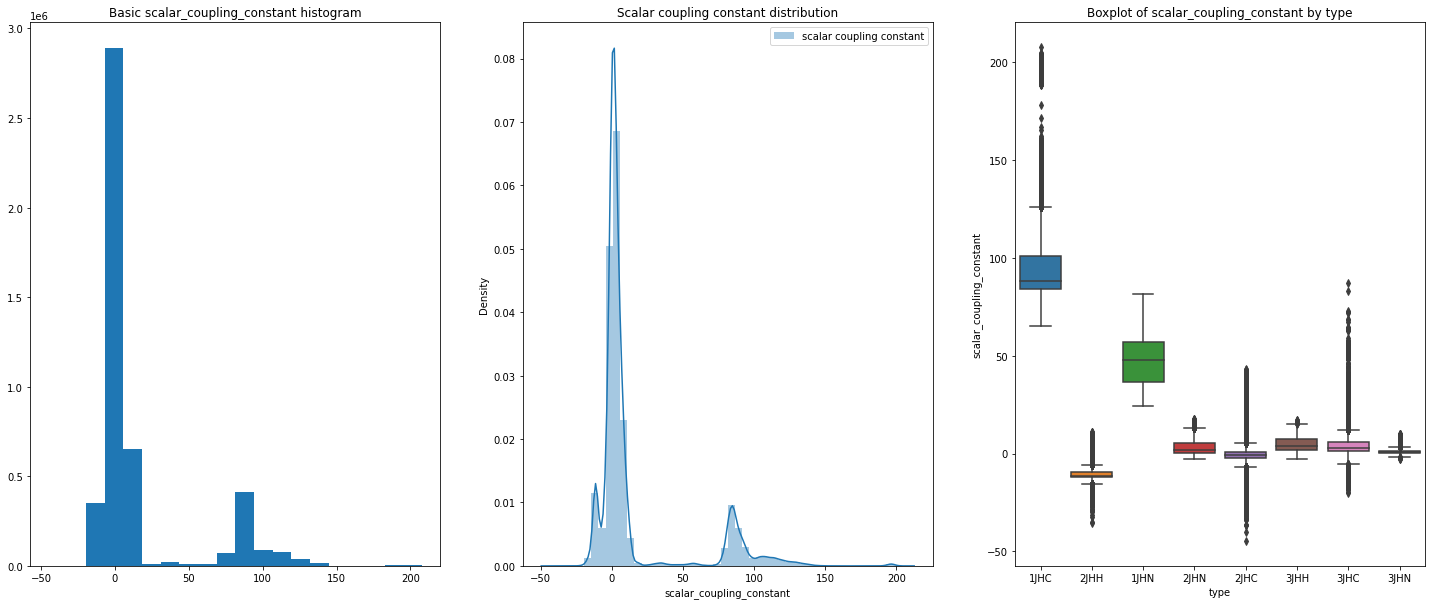

In [ ]:
## Histogram for scalar coupling constant
fig, ax = plt.subplots(figsize = (25, 10))
plt.subplot(1, 3, 1)
plt.hist(train['scalar_coupling_constant'], bins=20)
plt.title('Basic scalar_coupling_constant histogram')

plt.subplot(1, 3, 2);
sns.distplot(train.scalar_coupling_constant, label="scalar coupling constant")
plt.legend();
plt.title("Scalar coupling constant distribution");

plt.subplot(1, 3, 3);
sns.boxplot(x='type', y='scalar_coupling_constant', data=train)
plt.title('Boxplot of scalar_coupling_constant by type')

##https://www.kaggle.com/code/artgor/molecular-properties-eda-and-models#Data-loading-and-overview

Few intresting things can be inferred from the above plots.
* It has a huge peak around 0, with a normal-like distribution between -25 and +25. Then it has some values above +75 which gradually tapers down upto 150 and a long tail to 200.
* different coupling types have really different values of target variable. Maybe it would make sense to build separate models for each of them;

In [ ]:
## Estimate Skewness and Kurtosis
print('Skewness values are \n')
print(train.skew())
print('*'*100)
print('\nKurtosis values are \n')
print(train.kurt())

Skewness values are 

id                          1.524508851339891e-16
atom_index_0                4.681300122389724e-01
atom_index_1                1.145297574157255e+00
scalar_coupling_constant    2.025077048639738e+00
dtype: float64
****************************************************************************************************

Kurtosis values are 

id                         -1.200000000000000
atom_index_0               -0.241542302646864
atom_index_1                0.692346552436198
scalar_coupling_constant    3.032818002323788
dtype: float64


Inference:

* Kurtosis value for gaussian random variable is 3.....as per lecture notes.


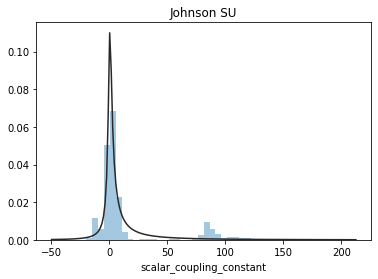

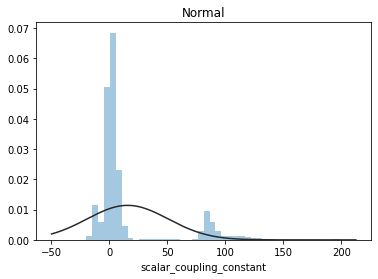

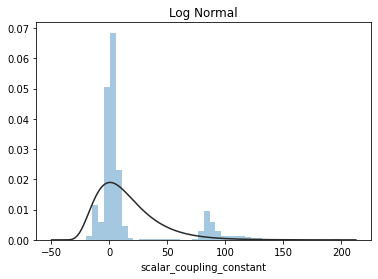

In [ ]:
target = train['scalar_coupling_constant']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(target, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(target, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(target, kde=False, fit=st.lognorm)

* It is apparent that SalePrice doesn't follow normal distribution.
* While log transformation does pretty good job, best fit is unbounded Johnson distribution.

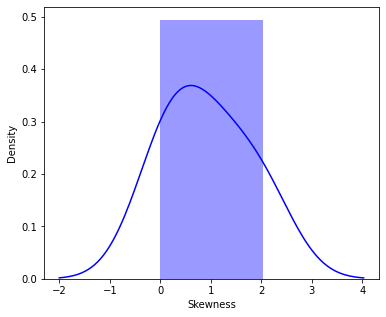

In [ ]:
plt.figure(figsize = (6,5))
sns.distplot(train.skew(),color='blue',axlabel ='Skewness')
plt.show()

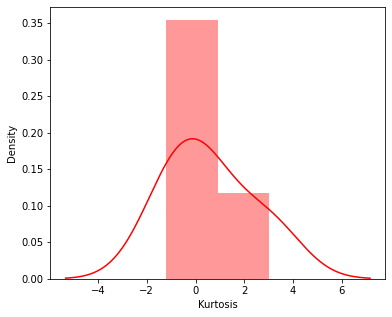

In [ ]:
plt.figure(figsize = (6,5))
sns.distplot(train.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

(array([1.000000e+01, 3.000000e+01, 2.350000e+02, 1.442000e+03,
        9.480000e+03, 5.880300e+04, 3.352440e+05, 1.442219e+06,
        7.717920e+05, 7.509460e+05]),
 array([-13.12236338, -11.27651323,  -9.43066309,  -7.58481295,
         -5.7389628 ,  -3.89311266,  -2.04726251,  -0.20141237,
          1.64443777,   3.49028792,   5.33613806]),
 <a list of 10 Patch objects>)

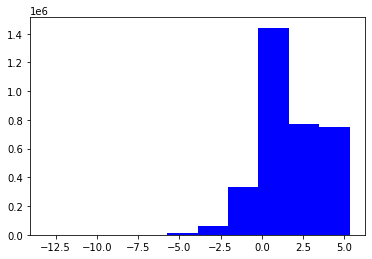

In [ ]:
target = np.log(train['scalar_coupling_constant'])
target.skew()
plt.hist(target,color='blue')

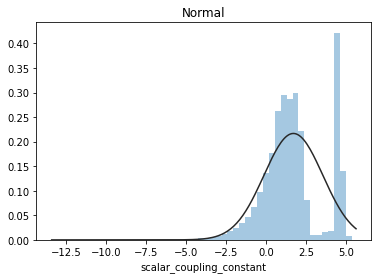

In [ ]:
plt.figure(1); plt.title('Normal')
sns.distplot(target, kde=False, fit=st.norm)

* After transforming to logaritmic the scalar_coupling constant behaves like log normal distribution

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])

numeric_features.columns

Index(['id', 'atom_index_0', 'atom_index_1', 'scalar_coupling_constant'], dtype='object')

In [ ]:
categorical_features = train.select_dtypes(include=[np.object])

categorical_features.columns

Index(['molecule_name', 'type'], dtype='object')

In [ ]:
## Correlation of features
correlation = numeric_features.corr()
print(correlation['scalar_coupling_constant'].sort_values(ascending = False),'\n')

scalar_coupling_constant    1.000000000000000
atom_index_0                0.018982360408020
id                         -0.007065171942907
atom_index_1               -0.218904380193119
Name: scalar_coupling_constant, dtype: float64 



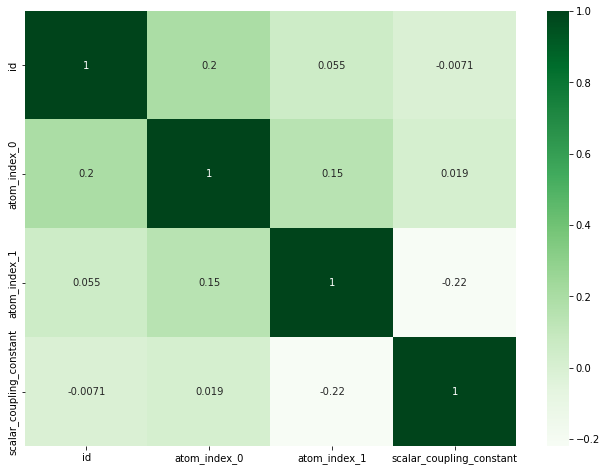

In [ ]:
## Correlation matrix
corr = train.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

Inference

* Generally, 0.7 is taken as the threshold which means if any 2 features have a correlation above 0.7, one of the two features can be dropped.
* As per the above correlation matrix we dont have to drop any feature

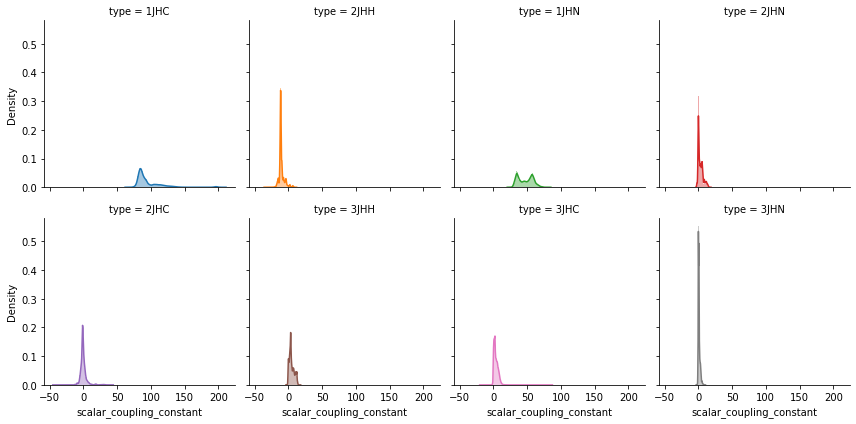

In [ ]:
## Multi-plot grid for plotting conditional relationships
grid = sns.FacetGrid(train[['type', 'scalar_coupling_constant']], col='type', hue='type', col_wrap=4)
grid.map(sns.distplot, 'scalar_coupling_constant')

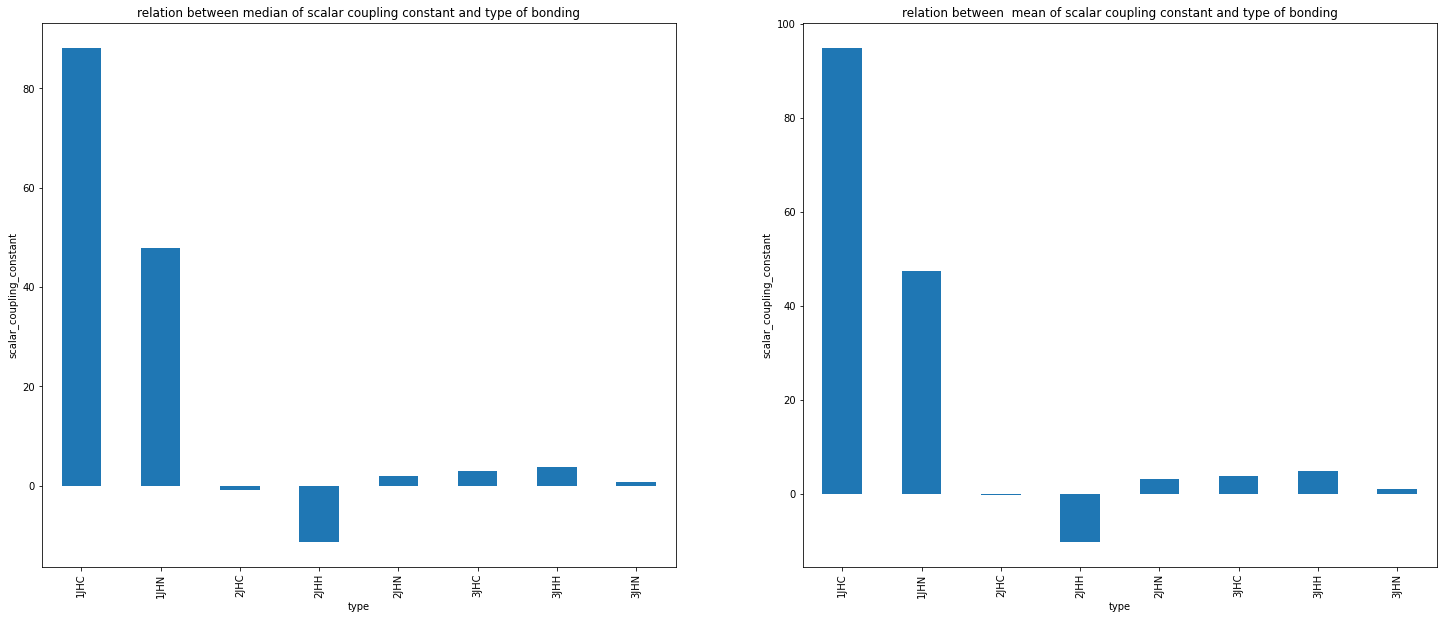

In [ ]:
## Lets see the relation between scalar coupling constabt ant type
plt.figure(figsize=(25,10))

plt.subplot(121)
train.groupby("type")['scalar_coupling_constant'].median().plot.bar()
plt.ylabel("scalar_coupling_constant")
plt.title("relation between median of scalar coupling constant and type of bonding")

plt.subplot(122)
train.groupby("type")['scalar_coupling_constant'].mean().plot.bar()
plt.ylabel("scalar_coupling_constant")
plt.title("relation between  mean of scalar coupling constant and type of bonding")

plt.show()

Inference

* We can see the value ranges very different in each coupling type. "1JHC" coupling type is biggest, around 80. "1JHN" is the second biggest around 50. Other coupling types are around 0.

* 2JHH coupling type is having the lowest scalar coupling constant, where as 1JHC is having the highest scalar coupling constant

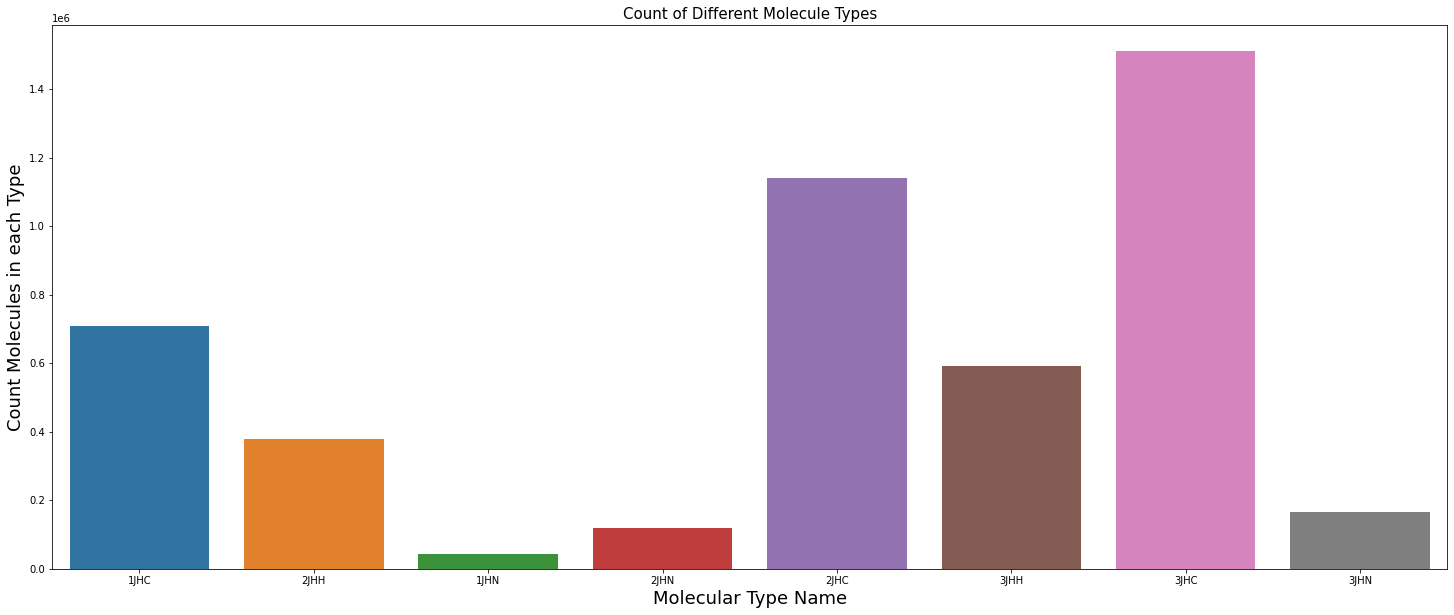

In [ ]:
g = plt.figure(figsize=(25,10)) 
g = sns.countplot(x='type', data=train, )
g.set_title("Count of Different Molecule Types", fontsize=15)
g.set_xlabel("Molecular Type Name", fontsize=18)
g.set_ylabel("Count Molecules in each Type", fontsize=18)

plt.show()

* coupling types are unevenly distributed. There are 3 very popular, 3 quite rare and 2 with medium frequency;

* As we already know there are 8 types of coupling and they have very different values of scalar coupling constant. While it is possible to build one single model on this dataset, training 8 separate models seems to be more reasonable. And it could be worth working on different types separately.

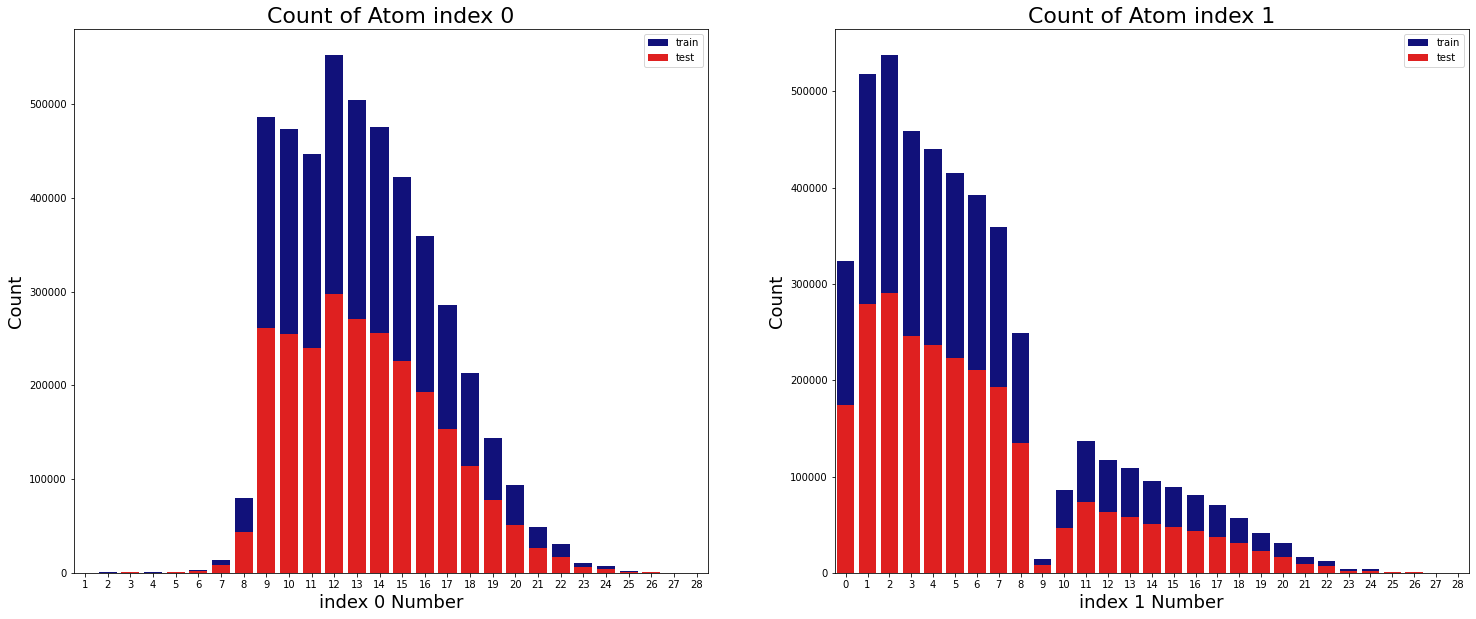

In [ ]:
## Lets check the distribution of atom_idx_1 and atom_0
plt.figure(figsize=(25,10))

g = plt.subplot(121)
g = sns.countplot(x='atom_index_0', data=train, color='darkblue', label = "train" )
g = sns.countplot(x='atom_index_0', data=test, color = 'red' , label = 'test')
g.set_title("Count of Atom index 0", fontsize=22)
g.set_xlabel("index 0 Number", fontsize=18)
g.set_ylabel("Count", fontsize=18)
plt.legend();

g1 = plt.subplot(122)
g1 = sns.countplot(x='atom_index_1',data=train, color='darkblue' ,label = "train")
g1 = sns.countplot(x='atom_index_1', data=test, color = 'red' ,label = 'test')
g1.set_title("Count of Atom index 1", fontsize=22)
g1.set_xlabel("index 1 Number", fontsize=18)
g1.set_ylabel("Count", fontsize=18)
plt.legend();

plt.show()
##https://www.kaggle.com/code/kabure/simple-eda-lightgbm-autotuning-w-hyperopt

Interesting.

* The distributions of atom indexes and type across train and test look very similar. That's good news!

* As the distribution of train and test is similar we can say that the model trained on training data will work reasonably well for this atom_index.

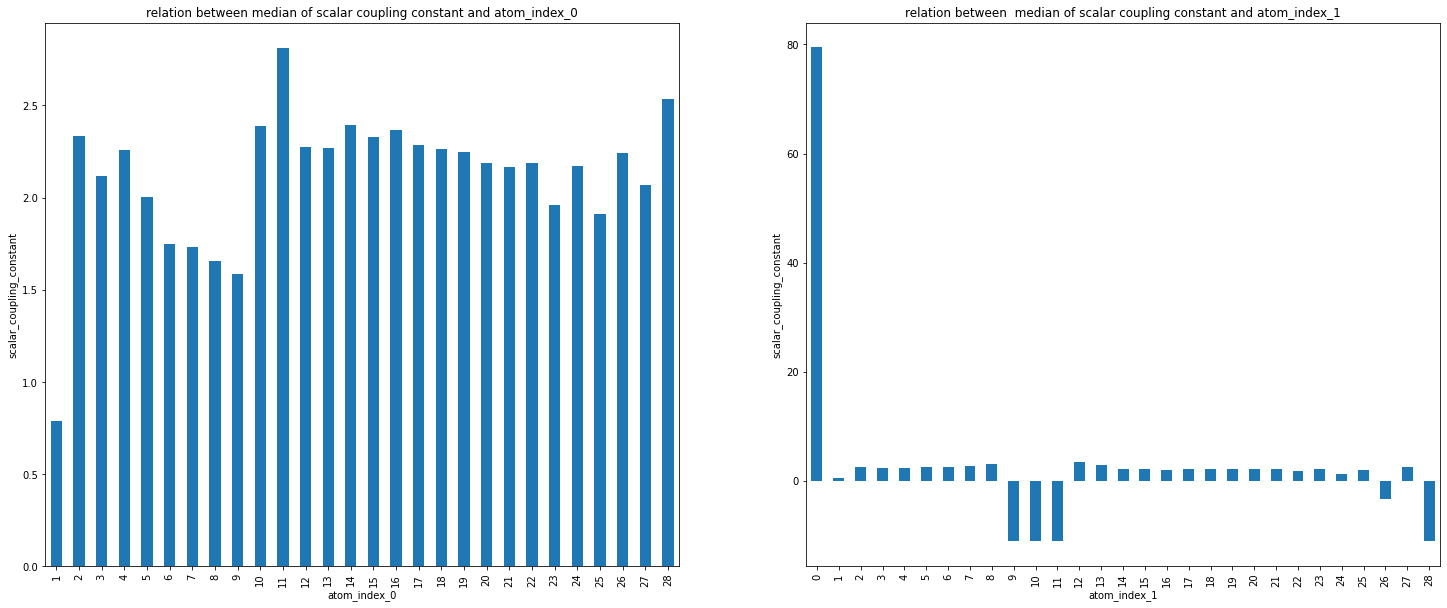

In [ ]:
## Lets see the relation between scalar coupling constabt ant atomindex
## Bar plot inorder to show the discrete feature.
plt.figure(figsize=(25,10))

plt.subplot(121)
train.groupby("atom_index_0")['scalar_coupling_constant'].median().plot.bar()
plt.ylabel("scalar_coupling_constant")
plt.title("relation between median of scalar coupling constant and atom_index_0")

plt.subplot(122)
train.groupby("atom_index_1")['scalar_coupling_constant'].median().plot.bar()
plt.ylabel("scalar_coupling_constant")
plt.title("relation between  median of scalar coupling constant and atom_index_1")

plt.show()

Inference

* From the plot it is not clear about the relation between scalar coupling constant and atom_index.

* For atom_index_0 the range of scalar coupling constant is between 0.75 to 2.75. But there  is np clear cut trend is visible but approximately we can say that when the atom_index_0 increases then the scalar coupling constant is also increasing.
*For atom_index_1 the range of scalar coupling constant is between -10 to 80.

**Multivariate analysis**

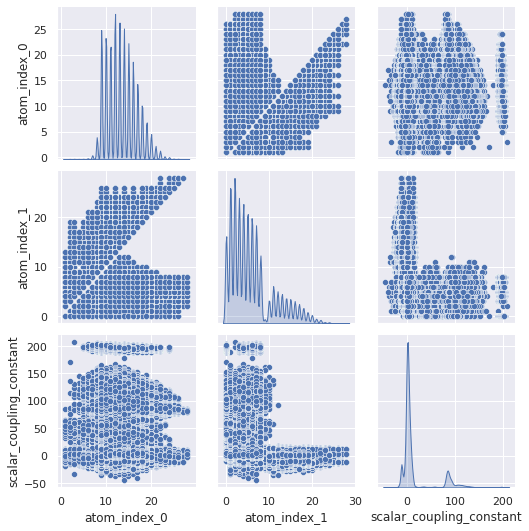

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
columns = train.iloc[:, 1:]
sns.pairplot(columns, diag_kind='kde')   
plt.show()
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)

Inference
* atom_index_1 is right skewed i.e right tailed
* from multivariate plot we can not relate any feature

**Plotting network graphs by type**

We have molecules, atom pairs, so this means data, which is interconnected. Network graphs should be useful to visualize such data!

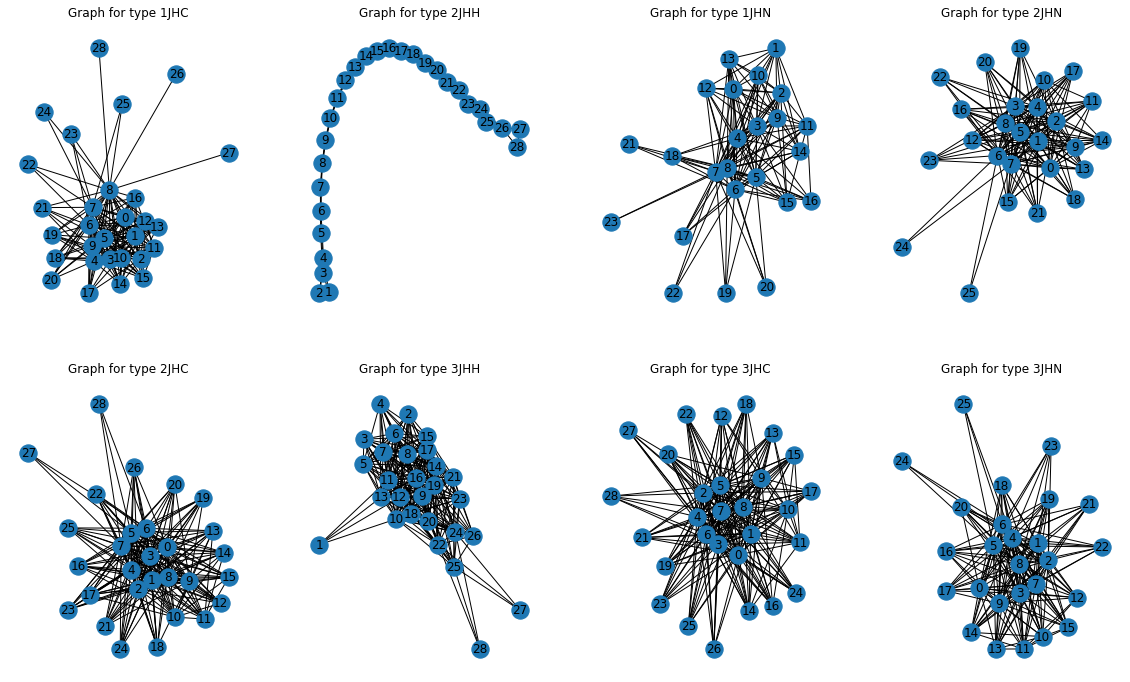

In [ ]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(train['type'].unique()):
    train_type = train.loc[train['type'] == t]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', edge_key= ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

Cool! We can see that atom connections have different shapes for different types. Type 2JHH has an expecially unique scheme. Also we can see that some atoms are connected only to several other atoms.

**Better network graphs**


But there is a little problem: as we saw earlier, there are atoms which are very rare, as a result graphs will be skewed due to them. Now I'll drop atoms for each type which are present in less then 1% of connections

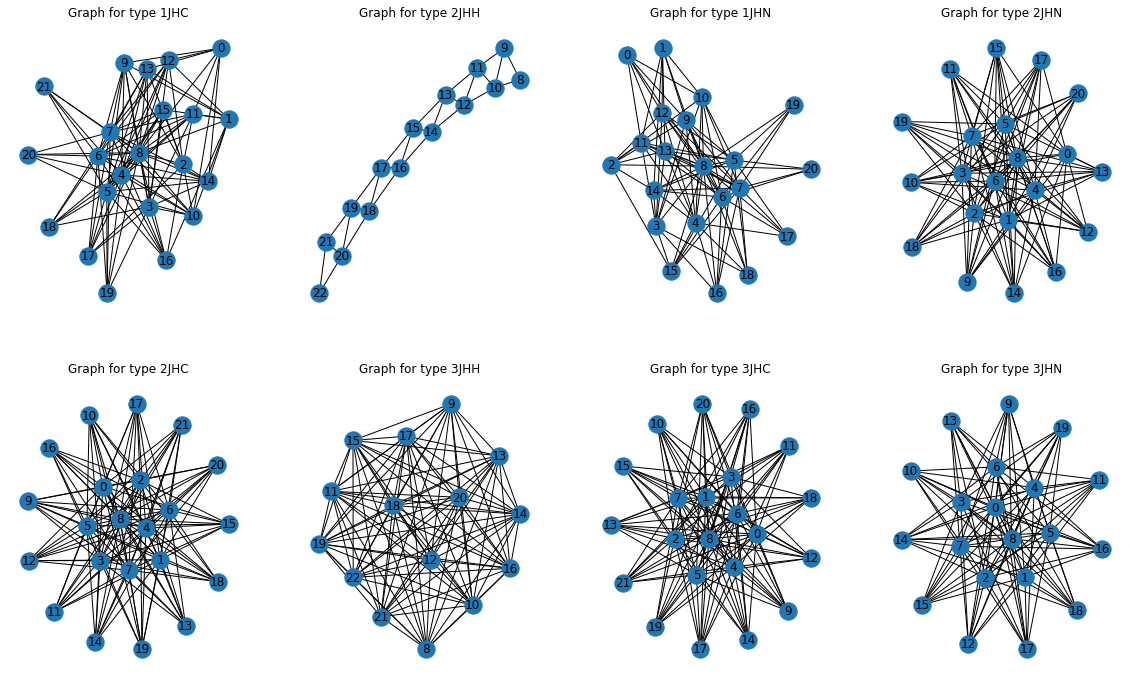

In [ ]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(train['type'].unique()):
    train_type = train.loc[train['type'] == t]
    bad_atoms_0 = list(train_type['atom_index_0'].value_counts(normalize=True)[train_type['atom_index_0'].value_counts(normalize=True) < 0.01].index)
    bad_atoms_1 = list(train_type['atom_index_1'].value_counts(normalize=True)[train_type['atom_index_1'].value_counts(normalize=True) < 0.01].index)
    bad_atoms = list(set(bad_atoms_0 + bad_atoms_1))
    train_type = train_type.loc[(train_type['atom_index_0'].isin(bad_atoms_0) == False) & (train_type['atom_index_1'].isin(bad_atoms_1) == False)]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', edge_key = ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

Now the graphs are much more clear!

**Digging into structures data**

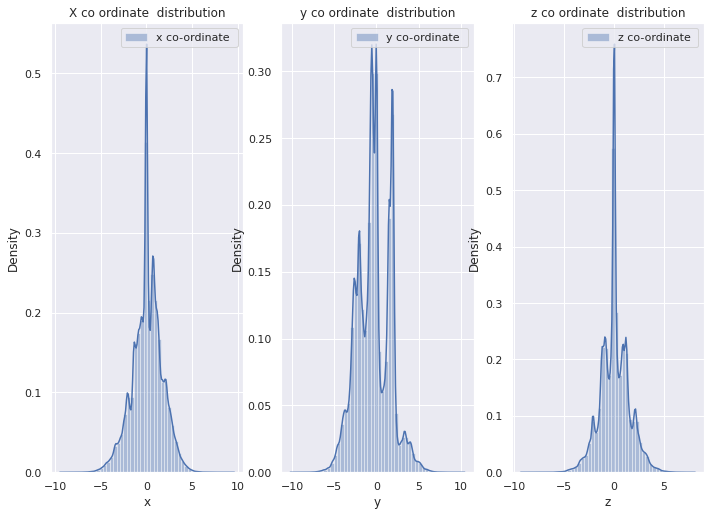

In [ ]:
plt.subplot(1, 3, 1);
sns.distplot(structures.x, label="x co-ordinate ")
plt.legend();
plt.title("X co ordinate  distribution");

plt.subplot(1, 3, 2);
sns.distplot(structures.y, label="y co-ordinate ")
plt.legend();
plt.title("y co ordinate  distribution");

plt.subplot(1, 3, 3);
sns.distplot(structures.z, label="z co-ordinate ")
plt.legend();
plt.title("z co ordinate  distribution");

In [ ]:
## Estimate Skewness and Kurtosis
print('Skewness values are \n')
print(structures.skew())
print('*'*100)
print('\nKurtosis values are \n')
print(structures.kurt())

Skewness values are 

atom_index    0.221841846786842
x            -0.199705589766379
y             0.078649052285049
z             0.044913670239689
dtype: float64
****************************************************************************************************

Kurtosis values are 

atom_index   -0.882963942608056
x             0.483553342475489
y            -0.038899252421122
z             0.796019250595762
dtype: float64


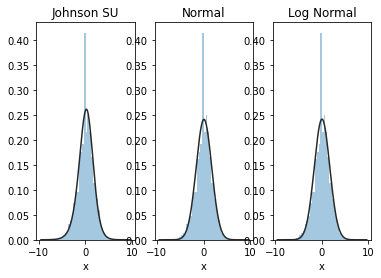

In [ ]:
target = structures['x']
plt.subplot(131); plt.title('Johnson SU')
sns.distplot(target, kde=False, fit=st.johnsonsu)
plt.subplot(132); plt.title('Normal')
sns.distplot(target, kde=False, fit=st.norm)
plt.subplot(133); plt.title('Log Normal')
sns.distplot(target, kde=False, fit=st.lognorm)

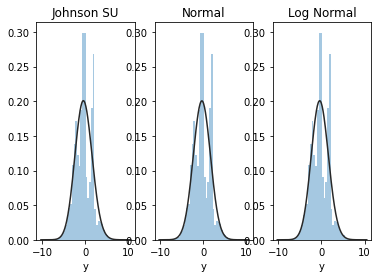

In [ ]:
target = structures['y']
plt.subplot(131); plt.title('Johnson SU')
sns.distplot(target, kde=False, fit=st.johnsonsu)
plt.subplot(132); plt.title('Normal')
sns.distplot(target, kde=False, fit=st.norm)
plt.subplot(133); plt.title('Log Normal')
sns.distplot(target, kde=False, fit=st.lognorm)

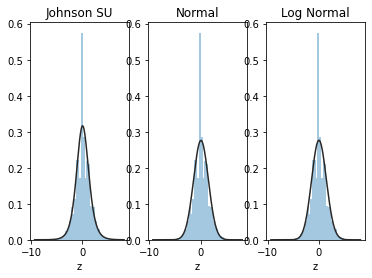

In [ ]:
target = structures['z']
plt.subplot(131); plt.title('Johnson SU')
sns.distplot(target, kde=False, fit=st.johnsonsu)
plt.subplot(132); plt.title('Normal')
sns.distplot(target, kde=False, fit=st.norm)
plt.subplot(133); plt.title('Log Normal')
sns.distplot(target, kde=False, fit=st.lognorm)

Inferebce:

* X -co-ordinate is fitting the the normal distribution 

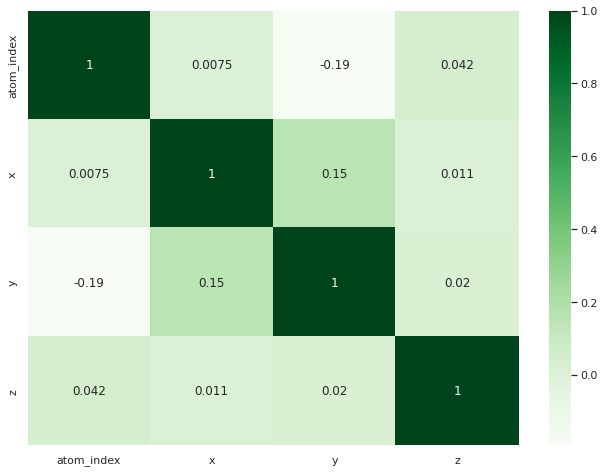

In [ ]:
## Correlation matrix
corr = structures.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

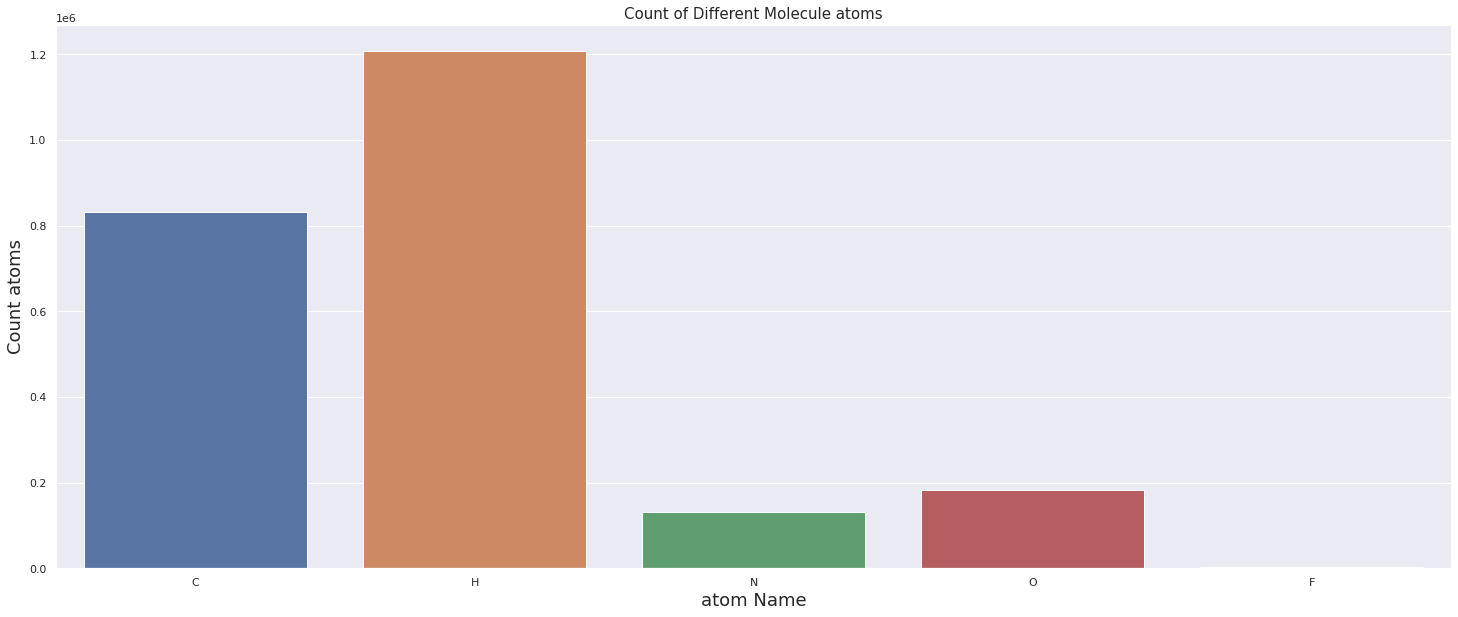

In [ ]:
g = plt.figure(figsize=(25,10)) 
g = sns.countplot(x='atom', data=structures, )
g.set_title("Count of Different Molecule atoms", fontsize=15)
g.set_xlabel("atom Name", fontsize=18)
g.set_ylabel("Count atoms", fontsize=18)

plt.show()

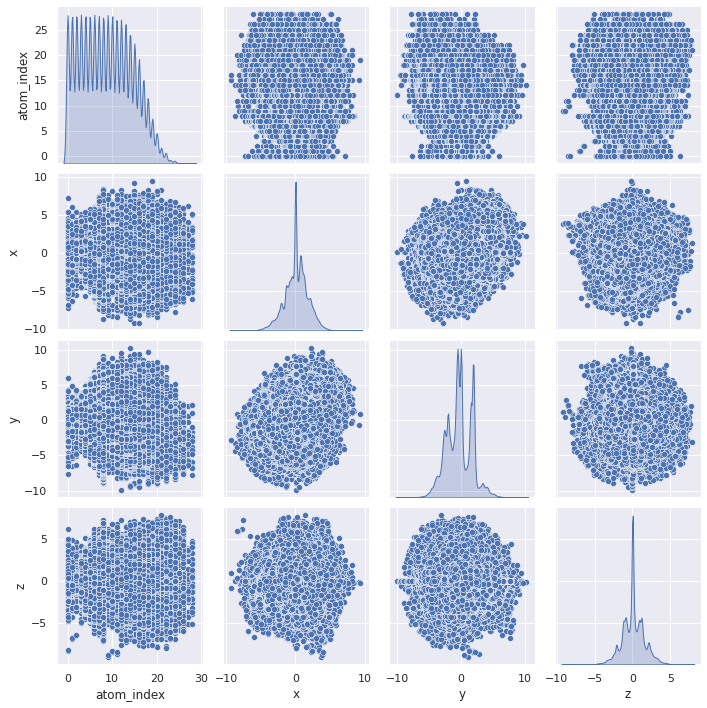

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
columns = structures.iloc[:, 1:]
sns.pairplot(columns, diag_kind='kde')
plt.show()

# Basic feature engineering

basic approach to feature engineering.

In [ ]:
def map_atom_info(df, atom_idx):
    '''
    Combining the training data and structures data
    '''
    df = pd.merge(df, structures, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    ## Merging df and structures based on molecule_name and atmo_index
    
    df = df.drop('atom_index', axis=1)

    ## Renmaing the x,y and z values based on the atom_idx 
 
    df = df.rename(columns={'atom': f'atom_{atom_idx}',
                            'x': f'x_{atom_idx}',
                            'y': f'y_{atom_idx}',
                            'z': f'z_{atom_idx}'})
   
    return df

## https://www.kaggle.com/code/artgor/molecular-properties-eda-and-models#Data-loading-and-overview
train = map_atom_info(train, 0)
train = map_atom_info(train, 1)

test = map_atom_info(test, 0)
test = map_atom_info(test, 1)

#### Distance as a feature

In [ ]:
## combining training data (x,y,z) into single column and  the same for test data 
train_p_0 = train[['x_0', 'y_0', 'z_0']].values
train_p_1 = train[['x_1', 'y_1', 'z_1']].values
test_p_0 = test[['x_0', 'y_0', 'z_0']].values
test_p_1 = test[['x_1', 'y_1', 'z_1']].values

## Getting distance as feature ( distance between the two atoms)
train['dist'] = np.linalg.norm(train_p_0 - train_p_1, axis=1)
test['dist'] = np.linalg.norm(test_p_0 - test_p_1, axis=1)
train['dist_x'] = (train['x_0'] - train['x_1']) ** 2
test['dist_x'] = (test['x_0'] - test['x_1']) ** 2
train['dist_y'] = (train['y_0'] - train['y_1']) ** 2
test['dist_y'] = (test['y_0'] - test['y_1']) ** 2
train['dist_z'] = (train['z_0'] - train['z_1']) ** 2
test['dist_z'] = (test['z_0'] - test['z_1']) ** 2

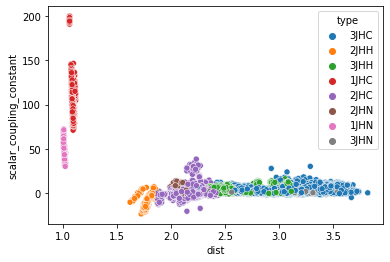

In [ ]:
train_df_sampled = train.sample(20000)
sns.scatterplot(x="dist", y="scalar_coupling_constant", hue='type', data=train_df_sampled)

* Distance for 1J coupling is smaller since atom pair is neighbor to each other, and its scalar coupling constant is higher.

* Distance tend to be long from 2J to 3J coupling, but its scalar coupling constant value is similar.

* It seems only distance feature is not enough, we need other information to differentiate scalar coupling.

In [ ]:
train['type_0'] = train['type'].apply(lambda x: x[0])
test['type_0'] = test['type'].apply(lambda x: x[0])
train['type_1'] = train['type'].apply(lambda x: x[1:])
test['type_1'] = test['type'].apply(lambda x: x[1:])

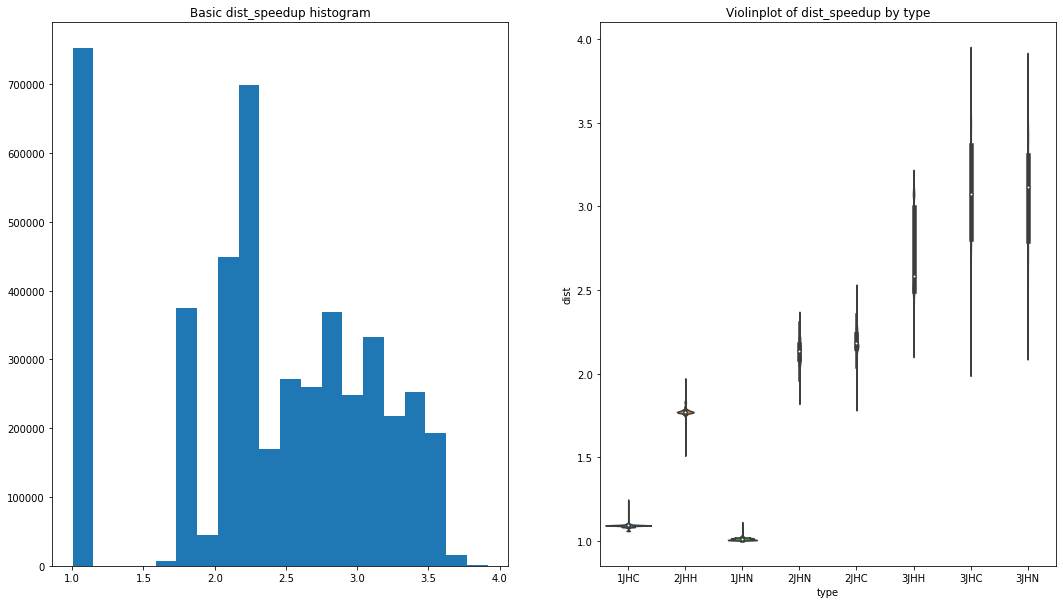

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
plt.subplot(1, 2, 1);
plt.hist(train['dist'], bins=20);
plt.title('Basic dist_speedup histogram');
plt.subplot(1, 2, 2);
sns.violinplot(x='type', y='dist', data=train);
plt.title('Violinplot of dist_speedup by type');

##https://www.kaggle.com/code/artgor/molecular-properties-eda-and-models#Data-loading-and-overview

Distance for 1J coupling is smaller since atom pair is neighbor to each other, and its scalar coupling constant is higher.

Distance tend to be long from 2J to 3J coupling, but its scalar coupling constant value is similar.

In [ ]:
## Creating new column in dataframe which is  train_dist / mean of train_dist by each group
train['dist_to_type_mean'] = train['dist'] / train.groupby('type')['dist'].transform('mean')
test['dist_to_type_mean'] = test['dist'] / test.groupby('type')['dist'].transform('mean')

train['dist_to_type_0_mean'] = train['dist'] / train.groupby('type_0')['dist'].transform('mean')
test['dist_to_type_0_mean'] = test['dist'] / test.groupby('type_0')['dist'].transform('mean')

train['dist_to_type_1_mean'] = train['dist'] / train.groupby('type_1')['dist'].transform('mean')
test['dist_to_type_1_mean'] = test['dist'] / test.groupby('type_1')['dist'].transform('mean')

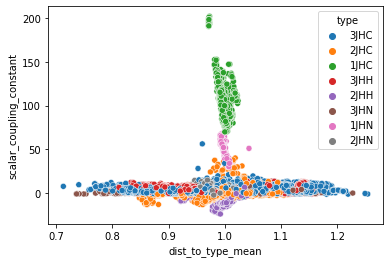

In [ ]:
train_df_sampled = train.sample(20000)
sns.scatterplot(x="dist_to_type_mean", y="scalar_coupling_constant", hue='type', data=train_df_sampled)

In [ ]:
## We are trying some other features
train['molecule_type_dist_mean'] = train.groupby(['molecule_name', 'type'])['dist'].transform('mean')
test['molecule_type_dist_mean'] = test.groupby(['molecule_name', 'type'])['dist'].transform('mean')

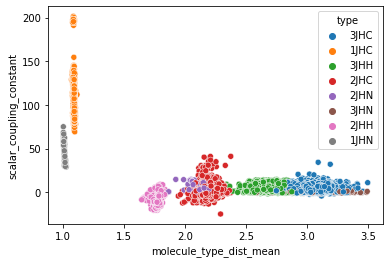

In [ ]:
train_df_sampled = train.sample(20000)
sns.scatterplot(x="molecule_type_dist_mean", y="scalar_coupling_constant", hue='type', data=train_df_sampled)

In [ ]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_to_type_mean,dist_to_type_0_mean,dist_to_type_1_mean,molecule_type_dist_mean
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807599999999994,H,0.0021504160,-0.0060313176,0.0019761204,...,1.091953059411922,0.000220479493527,1.192104705341944,0.000036299123586,1,JHC,0.999133628513182,1.003398650154437,0.462987796570779,1.091949649670276
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000000000000,H,0.0021504160,-0.0060313176,0.0019761204,...,1.783119756043802,1.019252639187251,2.160260536751212,0.000002888455246,2,JHH,1.004646886311544,0.852964160930999,0.762006828608377,1.783146310802238
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.254799999999999,H,0.0021504160,-0.0060313176,0.0019761204,...,1.783147496239978,0.294811517901285,2.112830659935847,0.771972815509771,2,JHH,1.004662515717039,0.852977430591141,0.762018683234989,1.783146310802238
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.254300000000001,H,0.0021504160,-0.0060313176,0.0019761204,...,1.783156685572550,0.276638182418367,2.085031923265944,0.817977659617770,2,JHH,1.004667693178802,0.852981826353860,0.762022610247825,1.783146310802238
4,4,dsgdb9nsd_000001,2,0,1JHC,84.807400000000001,H,1.0117308433,1.4637511618,0.0002765748,...,1.091951618862812,1.049454733424754,0.142843937832576,0.000059666679785,1,JHC,0.999132310415259,1.003397326429924,0.462987185778352,1.091949649670276


In [ ]:
numeric_features = train.select_dtypes(include=[np.number])

numeric_features.columns

Index(['id', 'atom_index_0', 'atom_index_1', 'scalar_coupling_constant', 'x_0',
       'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'dist', 'dist_x', 'dist_y', 'dist_z',
       'dist_to_type_mean', 'dist_to_type_0_mean', 'dist_to_type_1_mean',
       'molecule_type_dist_mean'],
      dtype='object')

In [ ]:
categorical_features = train.select_dtypes(include=[np.object])

categorical_features.columns

Index(['molecule_name', 'type', 'atom_0', 'atom_1', 'type_0', 'type_1'], dtype='object')

In [ ]:
print(train.skew())
print('*'*100)
print(train.kurt())

id                          1.524508851339891e-16
atom_index_0                4.681300122389724e-01
atom_index_1                1.145297574157255e+00
scalar_coupling_constant    2.025077048639738e+00
x_0                        -1.401701693170229e-01
y_0                         2.272119661702054e-02
z_0                         6.555704284214514e-02
x_1                        -2.139603931046321e-01
y_1                         2.973464047859642e-01
z_1                         3.840297095595556e-02
dist                       -3.274715234470686e-01
dist_x                      1.649716917947461e+00
dist_y                      1.182315625748929e+00
dist_z                      1.740542621408899e+00
type_0                     -5.970809883311384e-01
dist_to_type_mean           6.967425372756698e-02
dist_to_type_0_mean        -1.844040829152087e-01
dist_to_type_1_mean        -3.341176657304000e-01
molecule_type_dist_mean    -5.798274140563016e-01
dtype: float64
***********************************

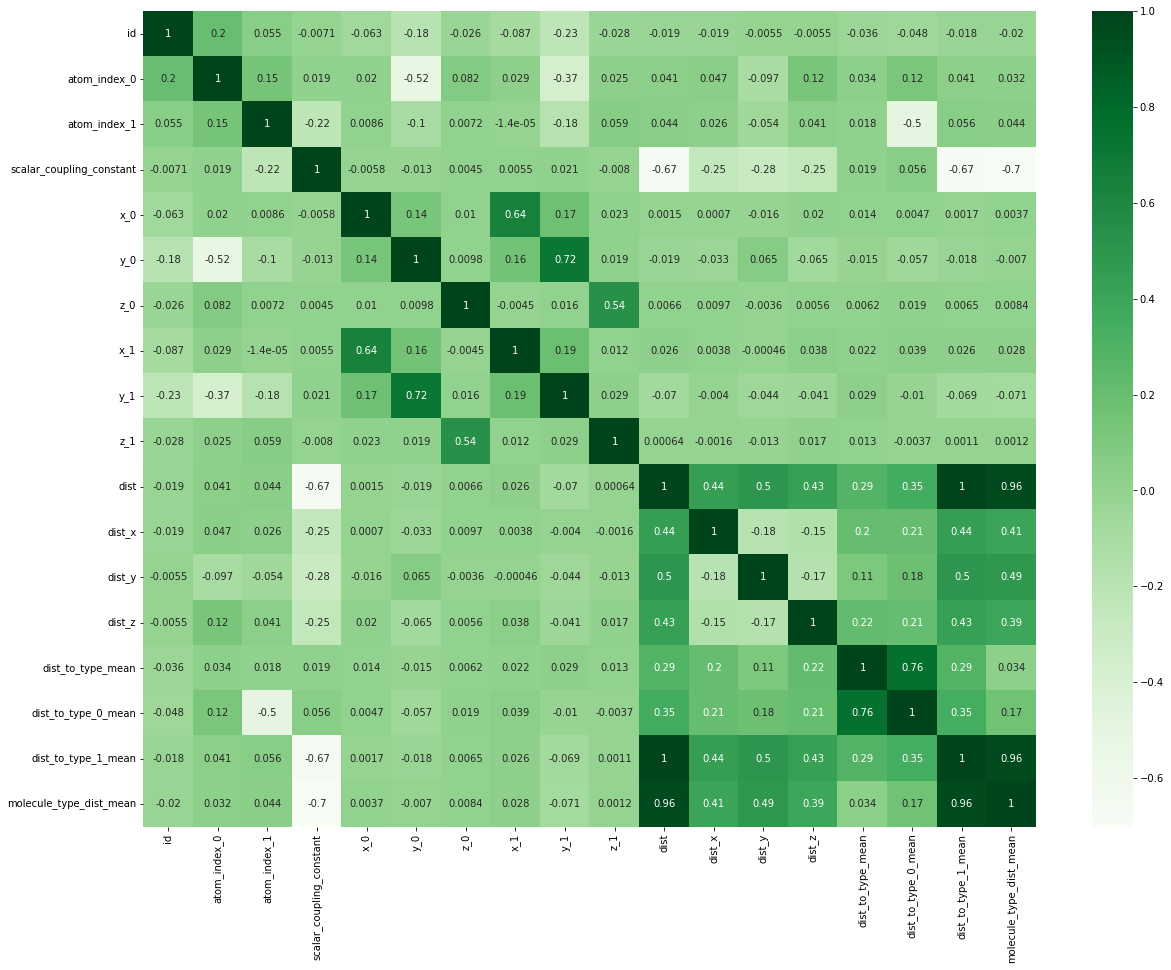

In [ ]:
## Correlation matrix on all generaed features
corr = train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

Inferenec:

* From the above heatmap it makes sense that some of our generated features has strong correlation among themselves, so it makes sense to remove one feature from that perticular corrleated features:::

* E.g. dist and dist_to_type_1_mean are strongly correlated it makes sense remove one of them.

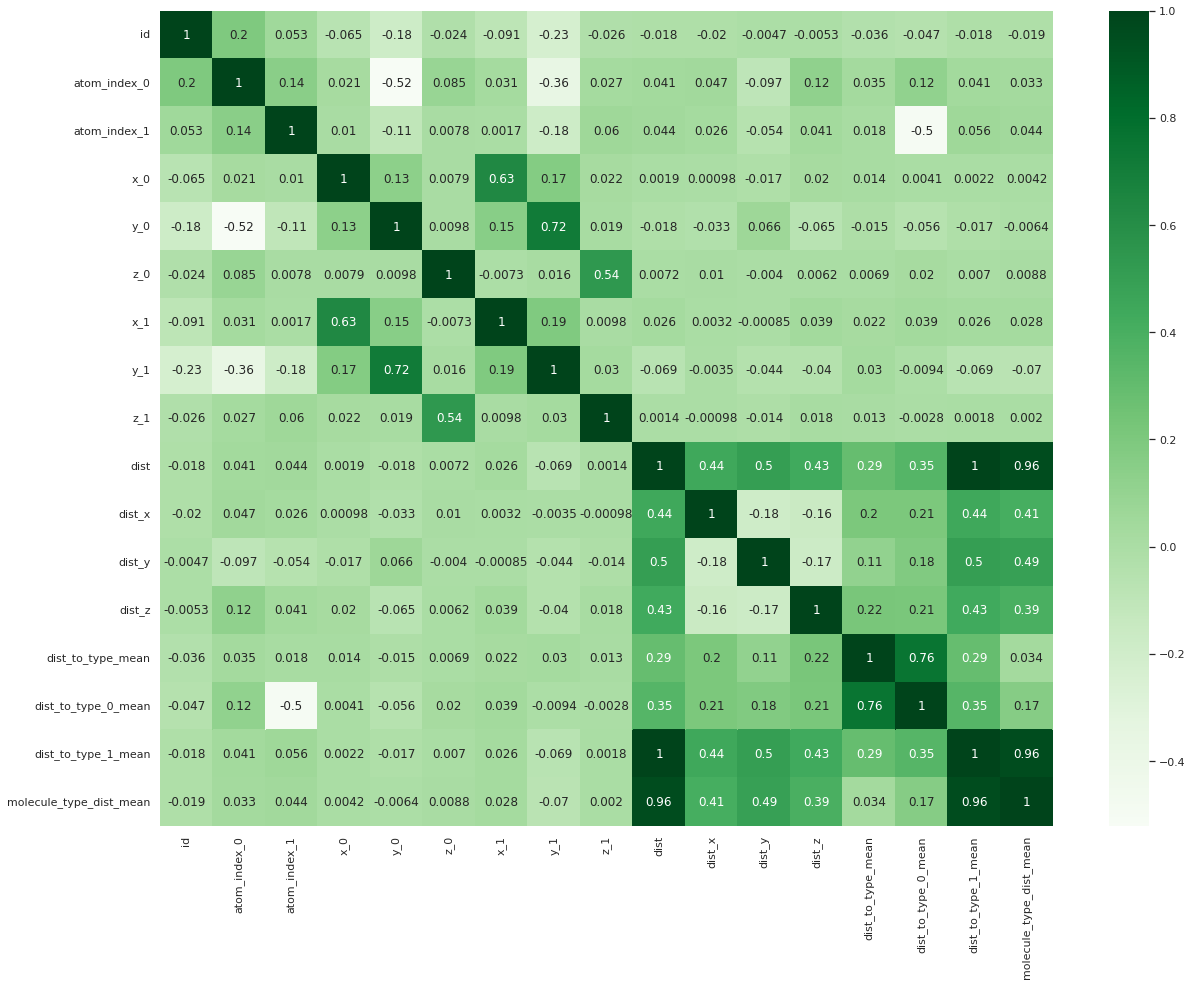

In [ ]:
## Correlation matrix on all generaed features
corr = test.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

# 4. Machine learning models

##### Random model(Baseline model)[Averaging the scalar coupling constant based on type]
Any sensible model must have performance greater than this model

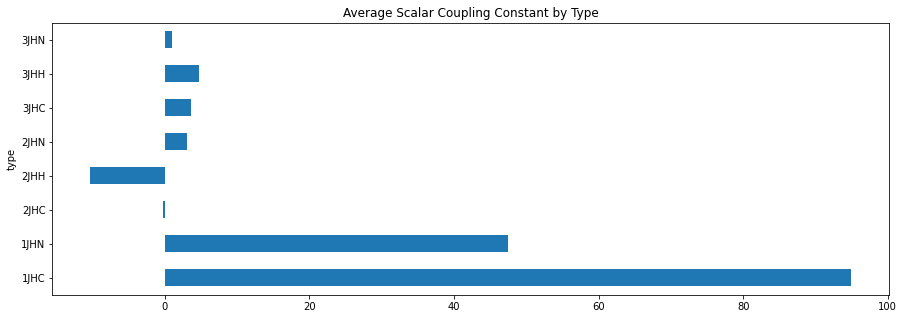

In [ ]:
train.groupby('type')['scalar_coupling_constant'].mean().plot(kind='barh',figsize=(15, 5),title='Average Scalar Coupling Constant by Type')
                                                                                                                                              
plt.show()
type_mean_dict = train.groupby('type')['scalar_coupling_constant'].mean().to_dict()
test['scalar_coupling_constant'] = test['type'].map(type_mean_dict)
test[['id','scalar_coupling_constant']].to_csv('random_model_submission.csv', index=False)

## https://www.kaggle.com/code/robikscube/exploring-molecular-properties-data#Super-Simple-Baseline-Model-[1.239-Public-LB]

##Below images shows the score of random model

#####Model with Labelencoder

In [ ]:
# Vectorizing the specified categorical features 
for i in ['atom_0', 'atom_1', 'type_0', 'type_1', 'type']:
    lbl = LabelEncoder()
    lbl.fit(list(train[i].values))
    train[i] = lbl.transform(list(train[i].values))
    test[i] = lbl.transform(list(test[i].values))

In [ ]:
X = train.drop(['scalar_coupling_constant','molecule_name','id'], axis = 1)
y = train['scalar_coupling_constant']
#X_test1 = test

In [ ]:
X_test = test.drop(['molecule_name','id'], axis = 1)

##### Standardization of numerical features 

In [ ]:
# normalizing numerical features 
from sklearn.preprocessing import StandardScaler
for i in ['x_0','y_0','z_0','x_1','y_1','z_1','dist','dist_x',	'dist_y',	'dist_z','dist_to_type_mean',	'dist_to_type_0_mean',	'dist_to_type_1_mean',	'molecule_type_dist_mean']:
    normalizer = StandardScaler()
    normalizer.fit(list(X[i].values.reshape(-1,1)))
    X[i] = normalizer.transform(list(X[i].values.reshape(-1,1)))
    X_test[i] = normalizer.transform(list(X_test[i].values.reshape(-1,1)))

In [ ]:
X.head()

,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_to_type_mean,dist_to_type_0_mean,dist_to_type_1_mean,molecule_type_dist_mean
0,1,0,0,0,-0.059013205274387,0.101839045280289,-0.031794757319859,0,-0.074261448979496,0.840058271720273,...,-1.722504276304074,-0.842474083703731,-0.418143720711958,-0.830621267643757,0,0,-0.011878777824590,0.035173799459241,-1.723141428103972,-1.790898533618582
1,1,2,3,0,-0.059013205274387,0.101839045280289,-0.031794757319859,1,0.619599934464387,1.054172439755179,...,-0.784426726981169,-0.406140905296218,-0.034004155772426,-0.830635844763166,1,1,0.063713234923850,-1.521724473458766,-0.763662148852460,-0.815533740185023
2,1,3,3,0,-0.059013205274387,0.101839045280289,-0.031794757319859,1,-0.431963108402551,1.044980924648573,...,-0.784389076939039,-0.716334939913156,-0.052823122362204,-0.493824330170828,1,1,0.063927528951568,-1.521587141181680,-0.763624110241605,-0.815533740185023
3,1,4,3,0,-0.059013205274387,0.101839045280289,-0.031794757319859,1,-0.420447777323268,1.039545758405941,...,-0.784376604829748,-0.724116469826707,-0.063852952750873,-0.473752354981690,1,1,0.063998516881009,-1.521541647921324,-0.763611509413425,-0.815533740185023
4,2,0,0,0,0.515652040829188,0.795146871678229,-0.032880775570075,0,-0.074261448979496,0.840058271720273,...,-1.722506231471743,-0.393208854381187,-0.834463657712660,-0.830611072347645,0,0,-0.011896850201874,0.035160099778935,-1.723143387988173,-1.790898533618582


In [ ]:
X_test.head()

,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_to_type_mean,dist_to_type_0_mean,dist_to_type_1_mean,molecule_type_dist_mean
0,2,0,2,0,-1.006061791500696,0.10468406469927,0.605947558860013,0,0.340416440828020,0.224929559399039,...,-0.135587914020924,1.346704304526921,-0.891140492528996,-0.830637105000064,1,0,0.446475824223334,0.847070812002943,-0.132483940435471,-0.140971228545558
1,2,1,0,0,-1.006061791500696,0.10468406469927,0.605947558860013,0,-0.471738056274264,0.224929559399039,...,-1.763023205480257,-0.359553704652878,-0.891140492528996,-0.830637105000064,0,0,-0.386640033204526,-0.247565537464661,-1.763798995417817,-1.833021394462447
2,2,3,6,0,-1.006061791500696,0.10468406469927,0.605947558860013,1,1.059792368187078,0.224929559399039,...,1.305933097298397,3.886367943690612,-0.891140492528996,-0.830637105000064,2,1,3.158810776696651,1.198031887930649,1.349183271418354,1.357783209911012
3,3,0,0,0,0.885587295972363,0.10468406469927,0.605947558860013,0,0.340416440828020,0.224929559399039,...,-1.763023205480257,-0.359553704652878,-0.891140492528996,-0.830637105000064,0,0,-0.386640033204526,-0.247565537464661,-1.763798995417817,-1.833021394462447
4,3,1,2,0,0.885587295972363,0.10468406469927,0.605947558860013,0,-0.471738056274264,0.224929559399039,...,-0.135587914020924,1.346704304526921,-0.891140492528996,-0.830637105000064,1,0,0.446475824223334,0.847070812002943,-0.132483940435471,-0.140971228545558


##### Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
fit = model.fit(X,y)

In [ ]:
## Metric for evaluatng the modedl performance
def group_mean_log_mae(y_true, y_pred, types, floor=1e-9):
    """
    Fast metric computation for this competition: https://www.kaggle.com/c/champs-scalar-coupling
    Code is from this kernel: https://www.kaggle.com/uberkinder/efficient-metric
    """
    maes = (y_true-y_pred).abs().groupby(types).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()

## https://www.kaggle.com/code/artgor/brute-force-feature-engineering

In [ ]:
y_predict = model.predict(X)
maes = group_mean_log_mae(y, y_predict ,train['type'])
print(maes)

1.4388401292214215


This maes score is worst than our random model

In [ ]:
fit.score(X, y, sample_weight=None)  ### R^2

0.945126341834054

###### Submission file saving into csv 

In [ ]:
y_predict = model.predict(X)
result = pd.DataFrame(y_predict,  columns = ['scalar_coupling_constant'])

result['id'] = test['id']

result = result[['id', 'scalar_coupling_constant']]
result.to_csv('submissionlr.csv', index = False)

##### Tree based models

In [ ]:
'''
#Building model, GridsearchCV
regressor= DecisionTreeRegressor(random_state=0)
parameters = {'max_depth': [5,50,100,200], 'min_samples_split': [5,50,100,150]}
clf = GridSearchCV(regressor, parameters, cv=3, return_train_score=True, n_jobs =-1)
#Training model
clf.fit(X, y)

#IMP paraneters
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
bestMaxDepth_1=clf.best_params_['max_depth']
bestMinSampleSplit_1=clf.best_params_['min_samples_split']
bestScore_1=clf.best_score_
'''

In [ ]:
#Building model
regressor= DecisionTreeRegressor(random_state=0)
#parameters = {'max_depth': [5,50,100,200], 'min_samples_split': [5,50,100,150]}

parameters = {'min_samples_split' : sp_randInt(5, 200),
              'max_depth'    : sp_randInt(3, 200)}
clf = RandomizedSearchCV(regressor, parameters, cv=2, return_train_score=True, n_iter=10, n_jobs =-1)
#Training model
clf.fit(X, y)


print(" Results from Random Search " )
print("\n The best score across ALL searched params:\n", clf.best_score_)
print("\n The best parameters across ALL searched params:\n", clf.best_params_)
bestMaxDepth_1=clf.best_params_['max_depth']
bestMinSampleSplit_1=clf.best_params_['min_samples_split']

 Results from Random Search 

 The best score across ALL searched params:
 0.9864380790968283

 The best parameters across ALL searched params:
 {'max_depth': 139, 'min_samples_split': 195}


In [ ]:
## With the best parameters
clf12= DecisionTreeRegressor(min_samples_split=bestMinSampleSplit_1, max_depth=bestMaxDepth_1)

clf12.fit(X, y)


DecisionTreeRegressor(max_depth=139, min_samples_split=195)

In [ ]:
y_pred = clf12.predict(X)
score = group_mean_log_mae(y, y_pred ,train['type'])
print(score)

0.41214708572582587


In [ ]:
y_predict = clf12.predict(X_test)
resultdt = pd.DataFrame(y_predict,  columns = ['scalar_coupling_constant'])

resultdt['id'] = test['id']

resultdt = resultdt[['id', 'scalar_coupling_constant']]
resultdt.to_csv('submissionDT2.csv', index = False)

##### More fEATURES

In [ ]:
import math
import gc
import copy

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
## https://www.kaggle.com/code/criskiev/distance-is-all-you-need-lb-1-481/notebook#Load-Everything

In [ ]:
# use atomic numbers to recode atomic names
SUBMISSIONS_PATH = './'

ATOMIC_NUMBERS = {
    'H': 1,
    'C': 6,
    'N': 7,
    'O': 8,
    'F': 9
}

Load Dataset

In [ ]:
train_dtypes = {
    'molecule_name': 'category',
    'atom_index_0': 'int8',
    'atom_index_1': 'int8',
    'type': 'category',
    'scalar_coupling_constant': 'float32'
}
train_csv = pd.read_csv('/content/train.csv', index_col='id', dtype=train_dtypes)
train_csv['molecule_index'] = train_csv.molecule_name.str.replace('dsgdb9nsd_', '').astype('int32')
train_csv = train_csv[['molecule_index', 'atom_index_0', 'atom_index_1', 'type', 'scalar_coupling_constant']]
train_csv.head(10)

,molecule_index,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
0,1,1,0,1JHC,84.807601928710938
1,1,1,2,2JHH,-11.256999969482422
2,1,1,3,2JHH,-11.254799842834473
3,1,1,4,2JHH,-11.254300117492676
4,1,2,0,1JHC,84.807403564453125
5,1,2,3,2JHH,-11.254099845886230
6,1,2,4,2JHH,-11.254799842834473
7,1,3,0,1JHC,84.809303283691406
8,1,3,4,2JHH,-11.254300117492676


In [ ]:
test_csv = pd.read_csv('./test.csv', index_col='id', dtype=train_dtypes)
test_csv['molecule_index'] = test_csv['molecule_name'].str.replace('dsgdb9nsd_', '').astype('int32')
test_csv = test_csv[['molecule_index', 'atom_index_0', 'atom_index_1', 'type']]
test_csv.head(10)

,molecule_index,atom_index_0,atom_index_1,type
id,,,,
4658147,4,2,0,2JHC
4658148,4,2,1,1JHC
4658149,4,2,3,3JHH
4658150,4,3,0,1JHC
4658151,4,3,1,2JHC
4658152,15,3,0,1JHC
4658153,15,3,2,3JHC
4658154,15,3,4,2JHH
4658155,15,3,5,2JHH


In [ ]:
structures_dtypes = {
    'molecule_name': 'category',
    'atom_index': 'int8',
    'atom': 'category',
    'x': 'float32',
    'y': 'float32',
    'z': 'float32'
}
structures_csv = pd.read_csv('./structures.csv', dtype=structures_dtypes)
structures_csv['molecule_index'] = structures_csv.molecule_name.str.replace('dsgdb9nsd_', '').astype('int32')
structures_csv = structures_csv[['molecule_index', 'atom_index', 'atom', 'x', 'y', 'z']]
structures_csv['atom'] = structures_csv['atom'].replace(ATOMIC_NUMBERS).astype('int8')
structures_csv.head(10)

,molecule_index,atom_index,atom,x,y,z
0,1,0,6,-0.012698136270046,1.085804104804993,0.008000995963812
1,1,1,1,0.002150415908545,-0.006031317636371,0.001976120285690
2,1,2,1,1.011730790138245,1.463751196861267,0.000276574806776
3,1,3,1,-0.540815055370331,1.447526574134827,-0.876643717288971
4,1,4,1,-0.523813605308533,1.437932610511780,0.906397283077240
5,2,0,7,-0.040426053106785,1.024107694625854,0.062563799321651
6,2,1,1,0.017257463186979,0.012545206584036,-0.027377158403397
7,2,2,1,0.915789365768433,1.358745217323303,-0.028757758438587
8,2,3,1,-0.520277738571167,1.343532085418701,-0.775542616844177
9,3,0,8,-0.034360494464636,0.977539598941803,0.007601592224091


In [ ]:
print('Shape: ', structures_csv.shape)
print('Total: ', structures_csv.memory_usage().sum())
structures_csv.memory_usage()

Shape:  (2358875, 6)
Total:  42459878


Index             128    
molecule_index    9435500
atom_index        2358875
atom              2358875
x                 9435500
y                 9435500
z                 9435500
dtype: int64

Build Distance Dataset

In [ ]:
def build_type_dataframes(base, structures, coupling_type):
    base = base[base['type'] == coupling_type].drop('type', axis=1).copy()
    base = base.reset_index()
    base['id'] = base['id'].astype('int32')
    structures = structures[structures['molecule_index'].isin(base['molecule_index'])]
    return base, structures

In [ ]:
def build_type_dataframes(base, structures, coupling_type):
    base = base[base['type'] == coupling_type].copy()
    base = base.reset_index()
    base['id'] = base['id'].astype('int32')
    structures = structures[structures['molecule_index'].isin(base['molecule_index'])]
    return base, structures

In [ ]:
def add_coordinates(base, structures, index):
    df = pd.merge(base, structures, how='inner',
                  left_on=['molecule_index', f'atom_index_{index}'],
                  right_on=['molecule_index', 'atom_index']).drop(['atom_index'], axis=1)
    df = df.rename(columns={
        'atom': f'atom_{index}',
        'x': f'x_{index}',
        'y': f'y_{index}',
        'z': f'z_{index}'
    })
    return df

In [ ]:
def add_atoms(base, atoms):
    df = pd.merge(base, atoms, how='inner',
                  on=['molecule_index', 'atom_index_0', 'atom_index_1'])
    return df

In [ ]:
def merge_all_atoms(base, structures):
    df = pd.merge(base, structures, how='left',
                  left_on=['molecule_index'],
                  right_on=['molecule_index'])
    df = df[(df.atom_index_0 != df.atom_index) & (df.atom_index_1 != df.atom_index)]
    return df

In [ ]:
def add_center(df):
    df['x_c'] = ((df['x_1'] + df['x_0']) * np.float32(0.5))
    df['y_c'] = ((df['y_1'] + df['y_0']) * np.float32(0.5))
    df['z_c'] = ((df['z_1'] + df['z_0']) * np.float32(0.5))

def add_distance_to_center(df):
    df['d_c'] = ((
        (df['x_c'] - df['x'])**np.float32(2) +
        (df['y_c'] - df['y'])**np.float32(2) + 
        (df['z_c'] - df['z'])**np.float32(2)
    )**np.float32(0.5))

def add_distance_between(df, suffix1, suffix2):
    df[f'd_{suffix1}_{suffix2}'] = ((
        (df[f'x_{suffix1}'] - df[f'x_{suffix2}'])**np.float32(2) +
        (df[f'y_{suffix1}'] - df[f'y_{suffix2}'])**np.float32(2) + 
        (df[f'z_{suffix1}'] - df[f'z_{suffix2}'])**np.float32(2)
    )**np.float32(0.5))

In [ ]:
def add_distances(df):
    n_atoms = 1 + max([int(c.split('_')[1]) for c in df.columns if c.startswith('x_')])
    
    for i in range(1, n_atoms):
        for vi in range(min(4, i)):
            add_distance_between(df, i, vi)

In [ ]:
def add_n_atoms(base, structures):
    dfs = structures['molecule_index'].value_counts().rename('n_atoms').to_frame()
    return pd.merge(base, dfs, left_on='molecule_index', right_index=True)

In [ ]:
def build_couple_dataframe(some_csv, structures_csv, coupling_type, n_atoms=10):
    base, structures = build_type_dataframes(some_csv, structures_csv, coupling_type)
    base = add_coordinates(base, structures, 0)
    base = add_coordinates(base, structures, 1)
    
    base = base.drop(['atom_0', 'atom_1'], axis=1)
    atoms = base.drop('id', axis=1).copy()
    if 'scalar_coupling_constant' in some_csv:
        atoms = atoms.drop(['scalar_coupling_constant'], axis=1)
        
    add_center(atoms)
    atoms = atoms.drop(['x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1'], axis=1)

    atoms = merge_all_atoms(atoms, structures)
    
    add_distance_to_center(atoms)
    
    atoms = atoms.drop(['x_c', 'y_c', 'z_c', 'atom_index'], axis=1)
    atoms.sort_values(['molecule_index', 'atom_index_0', 'atom_index_1', 'd_c'], inplace=True)
    atom_groups = atoms.groupby(['molecule_index', 'atom_index_0', 'atom_index_1'])
    atoms['num'] = atom_groups.cumcount() + 2
    atoms = atoms.drop(['d_c'], axis=1)
    atoms = atoms[atoms['num'] < n_atoms]

    atoms = atoms.set_index(['molecule_index', 'atom_index_0', 'atom_index_1', 'num']).unstack()
    atoms.columns = [f'{col[0]}_{col[1]}' for col in atoms.columns]
    atoms = atoms.reset_index()
    
    # downcast back to int8
    for col in atoms.columns:
        if col.startswith('atom_'):
            atoms[col] = atoms[col].fillna(0).astype('int8')
            
    atoms['molecule_index'] = atoms['molecule_index'].astype('int32')
    
    full = add_atoms(base, atoms)
    add_distances(full)
    
    full.sort_values('id', inplace=True)
    
    return full

In [ ]:
def take_n_atoms(df, n_atoms, four_start=4):
    labels = []
    for i in range(2, n_atoms):
        label = f'atom_{i}'
        labels.append(label)

    for i in range(n_atoms):
        num = min(i, 4) if i < four_start else 4
        for j in range(num):
            labels.append(f'd_{i}_{j}')
    if 'scalar_coupling_constant' in df:
        labels.append('scalar_coupling_constant')
    return df[labels]

In [ ]:
train_csv.head()

,molecule_index,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
0,1,1,0,1JHC,84.807601928710938
1,1,1,2,2JHH,-11.256999969482422
2,1,1,3,2JHH,-11.254799842834473
3,1,1,4,2JHH,-11.254300117492676
4,1,2,0,1JHC,84.807403564453125


Check GBDT with the smallest type

In [ ]:
%%time
full = build_couple_dataframe(train_csv, structures_csv, '1JHN', n_atoms=10)
print(full.shape)

(43680, 82)
CPU times: user 1.44 s, sys: 42.8 ms, total: 1.48 s
Wall time: 1.51 s


In [ ]:
full.columns

Index(['id', 'molecule_index', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1',
       'type_2', 'type_3', 'type_4', 'type_5', 'type_6', 'type_7', 'type_8',
       'type_9', 'atom_2', 'atom_3', 'atom_4', 'atom_5', 'atom_6', 'atom_7',
       'atom_8', 'atom_9', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8',
       'x_9', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'z_2',
       'z_3', 'z_4', 'z_5', 'z_6', 'z_7', 'z_8', 'z_9', 'd_1_0', 'd_2_0',
       'd_2_1', 'd_3_0', 'd_3_1', 'd_3_2', 'd_4_0', 'd_4_1', 'd_4_2', 'd_4_3',
       'd_5_0', 'd_5_1', 'd_5_2', 'd_5_3', 'd_6_0', 'd_6_1', 'd_6_2', 'd_6_3',
       'd_7_0', 'd_7_1', 'd_7_2', 'd_7_3', 'd_8_0', 'd_8_1', 'd_8_2', 'd_8_3',
       'd_9_0', 'd_9_1', 'd_9_2', 'd_9_3'],
      dtype='object')

In [ ]:
df = take_n_atoms(full, 7)
# LightGBM performs better with 0-s then with NaN-s
df = df.fillna(0)
df.columns

Index(['atom_2', 'atom_3', 'atom_4', 'atom_5', 'atom_6', 'd_1_0', 'd_2_0',
       'd_2_1', 'd_3_0', 'd_3_1', 'd_3_2', 'd_4_0', 'd_4_1', 'd_4_2', 'd_4_3',
       'd_5_0', 'd_5_1', 'd_5_2', 'd_5_3', 'd_6_0', 'd_6_1', 'd_6_2', 'd_6_3',
       'scalar_coupling_constant'],
      dtype='object')

In [ ]:
X_data = df.drop(['scalar_coupling_constant'], axis=1).values.astype('float32')
y_data = df['scalar_coupling_constant'].values.astype('float32')

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=128)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((34944, 23), (8736, 23), (34944,), (8736,))

##### **GBDT**

In [ ]:
from datetime import datetime
start = datetime.now()

#Building gbdt tree model
Model_1= GradientBoostingRegressor()
# hyperparameter space

    
parameters = {'learning_rate': sp_randFloat(),
              'n_estimators' : sp_randInt(100, 1000),
              'max_depth'    : sp_randInt(4, 10)}
#parameters = { 'n_estimators': [400,500,800,1000],'learning_rate': [0.1,0.5,0.8,0.9],}
clf_1 = RandomizedSearchCV(Model_1, param_distributions = parameters, cv=2,  n_iter = 5, n_jobs =-1)
clf_results_1= clf_1.fit(X_train, y_train)


print(clf_results_1.best_score_)
print(clf_results_1.best_estimator_)
print(clf_results_1.best_params_)

bestlearningrate=clf_results_1.best_params_['learning_rate']
bestestimator=clf_results_1.best_params_['n_estimators']

print(bestlearningrate, ' ,', bestestimator)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

0.9926858967081389
GradientBoostingRegressor(learning_rate=0.1563108578629867, max_depth=4,
                          n_estimators=734)
{'learning_rate': 0.1563108578629867, 'max_depth': 4, 'n_estimators': 734}
0.1563108578629867  , 734
Time:  0:14:05.915655


In [ ]:
gbdt= GradientBoostingRegressor(n_estimators = bestestimator, learning_rate = bestlearningrate)

gbdt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.1563108578629867, n_estimators=734)

In [ ]:
y_pred = gbdt.predict(X_train)
#score = group_mean_log_mae(y_train, y_pred ,train['type'])
score = np.log(mean_absolute_error(y_train, y_pred))
print(score)

-0.6945764791760535


In [ ]:
y_pred = gbdt.predict(X_val)
#score = group_mean_log_mae(y_train, y_pred ,train['type'])
score = np.log(mean_absolute_error(y_val, y_pred))
print(score)

-0.5496750432187871


##### Summary

In [1]:
# compare models using Prettytable library
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= (" Model "," maes score ")
tb.add_row([" Random model", 1.2369 ])
tb.add_row([" Linear regreesion ", 1.35577])
tb.add_row([" Decision tree with FE ", 0.47749])
tb.add_row([" GBDT_with_more_features ", -0.5496750432187871])
print(tb)

+---------------------------+---------------------+
|           Model           |      maes score     |
+---------------------------+---------------------+
|        Random model       |        1.2369       |
|     Linear regreesion     |       1.35577       |
|   Decision tree with FE   |       0.47749       |
|  GBDT_with_more_features  | -0.5496750432187871 |
+---------------------------+---------------------+
